In [1]:
import pandas as pd
import re
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import os
from collections import Counter

In [2]:
df = pd.read_csv('df.csv')
df

,Unnamed: 0.1,id,pro_democrat,against_democrat,pro_republican,against_republican,pro_biden,against_biden,pro_trump,against_trump,...,username,view_count,comment_count,create_time,region_code,share_count,voice_to_text,effect_ids,playlist_id,tiktokurl
0,0,7360845184135007534,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,imjustamerican,1003.0,14.0,1713830348,US,1.0,NaN,NaN,NaN,https://www.tiktok.com/@imjustamerican/video/7...
1,1,7360845184135007534,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,imjustamerican,1003.0,14.0,1713830348,US,1.0,NaN,NaN,NaN,https://www.tiktok.com/@imjustamerican/video/7...
2,2,7360845131764927790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,repmorales145,360.0,1.0,1713830335,US,3.0,NaN,NaN,NaN,https://www.tiktok.com/@repmorales145/video/73...
3,3,7360845131764927790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,repmorales145,359.0,1.0,1713830335,US,3.0,NaN,NaN,NaN,https://www.tiktok.com/@repmorales145/video/73...
4,4,7360844823407971626,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,tmac_123,60.0,0.0,1713830264,US,0.0,NaN,NaN,NaN,https://www.tiktok.com/@tmac_123/video/7360844...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,545529,7361867596553096491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,outkick,3160.0,10.0,1714327200,us,7.0,NaN,NaN,NaN,https://www.tiktok.com/@outkick/video/73618675...
545511,545530,7361574291906792746,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,jackmelancon888,252.0,6.0,1714000105,US,0.0,this is true however 66% of Americans polled d...,NaN,NaN,https://www.tiktok.com/@jackmelancon888/video/...
545512,545531,7361574145005522218,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,jwilliamj,51986.0,255.0,1714000071,US,285.0,NaN,NaN,NaN,https://www.tiktok.com/@jwilliamj/video/736157...
545513,545532,7361573416526220587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,cletusbuford,212.0,0.0,1713999903,US,0.0,NaN,NaN,NaN,https://www.tiktok.com/@cletusbuford/video/736...


In [3]:
df.columns

Index(['Unnamed: 0.1', 'id', 'pro_democrat', 'against_democrat',
       'pro_republican', 'against_republican', 'pro_biden', 'against_biden',
       'pro_trump', 'against_trump', 'pro_kamala', 'against_kamala',
       'Unnamed: 0', 'hashtag_names', 'like_count', 'music_id',
       'video_description', 'username', 'view_count', 'comment_count',
       'create_time', 'region_code', 'share_count', 'voice_to_text',
       'effect_ids', 'playlist_id', 'tiktokurl'],
      dtype='object')

In [4]:
import ast

df = df[~df.hashtag_names.isna()]
df['hashtags'] = df['hashtag_names'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
type(df['hashtags'].iloc[1])


list

In [5]:
df['num_hashtags'] = df['hashtags'].apply(len)

df

,Unnamed: 0.1,id,pro_democrat,against_democrat,pro_republican,against_republican,pro_biden,against_biden,pro_trump,against_trump,...,comment_count,create_time,region_code,share_count,voice_to_text,effect_ids,playlist_id,tiktokurl,hashtags,num_hashtags
0,0,7360845184135007534,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,14.0,1713830348,US,1.0,NaN,NaN,NaN,https://www.tiktok.com/@imjustamerican/video/7...,"[newyork, ny, democracy, democrat, ericadams, ...",7
1,1,7360845184135007534,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,14.0,1713830348,US,1.0,NaN,NaN,NaN,https://www.tiktok.com/@imjustamerican/video/7...,"[newyork, ny, democracy, democrat, ericadams, ...",7
2,2,7360845131764927790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1713830335,US,3.0,NaN,NaN,NaN,https://www.tiktok.com/@repmorales145/video/73...,"[houston, democracy, harriscounty, democrats, ...",9
3,3,7360845131764927790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1713830335,US,3.0,NaN,NaN,NaN,https://www.tiktok.com/@repmorales145/video/73...,"[houston, democracy, harriscounty, democrats, ...",9
4,4,7360844823407971626,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1713830264,US,0.0,NaN,NaN,NaN,https://www.tiktok.com/@tmac_123/video/7360844...,"[america, trump, foryou, fyp, saveamerica, fjb...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545510,545529,7361867596553096491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,1714327200,us,7.0,NaN,NaN,NaN,https://www.tiktok.com/@outkick/video/73618675...,"[culture, usa, montana, politics, news, united...",14
545511,545530,7361574291906792746,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,6.0,1714000105,US,0.0,this is true however 66% of Americans polled d...,NaN,NaN,https://www.tiktok.com/@jackmelancon888/video/...,"[america, politics, news, fyp, leftist, savega...",11
545512,545531,7361574145005522218,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,255.0,1714000071,US,285.0,NaN,NaN,NaN,https://www.tiktok.com/@jwilliamj/video/736157...,[],0
545513,545532,7361573416526220587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1713999903,US,0.0,NaN,NaN,NaN,https://www.tiktok.com/@cletusbuford/video/736...,"[truth, trending, viral, swiftie, foryou, cons...",11


In [6]:
sample_url = df[df['num_hashtags'] >= 100][df['view_count'] >= 100000]['tiktokurl'].sample(n=1).iloc[0]
print(sample_url)

https://www.tiktok.com/@capsoffpodcast/video/7393850711399730463


/tmp/ipykernel_846342/169169334.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sample_url = df[df['num_hashtags'] >= 100][df['view_count'] >= 100000]['tiktokurl'].sample(n=1).iloc[0]


In [7]:
def get_top_hashtags(df, group_col, group_val, hashtag_col='hashtags', top_n=10):
    filtered = df[df[group_col] == group_val][hashtag_col]
    all_hashtags = [tag for sublist in filtered for tag in sublist]
    top = Counter(all_hashtags).most_common(top_n)
    return pd.DataFrame(top, columns=['hashtag', 'count'])

# Example usage:
top_pro_dem_hashtags = get_top_hashtags(df, 'pro_democrat', 1, top_n=10)

top_ag_dem_hashtags = get_top_hashtags(df, 'against_democrat', 1, top_n=10)

top_pro_rep_hashtags = get_top_hashtags(df, 'pro_republican', 1, top_n=10)

top_ag_rep_hashtags = get_top_hashtags(df, 'against_republican', 1, top_n=10)


In [8]:
top_pro_dem_hashtags

,hashtag,count
0,voteblue,38931
1,trump,32197
2,biden,29955
3,fyp,27086
4,democrat,22544
5,kamalaharris,21385
6,maga,20476
7,democrats,18001
8,voteblue2024💙,16939
9,politics,15883


In [9]:
top_ag_dem_hashtags

,hashtag,count
0,trump,46788
1,trump2024,33177
2,biden,31837
3,maga,30838
4,fyp,26302
5,republican,22950
6,usa,16602
7,democrat,16495
8,joebiden,15359
9,donaldtrump,14291


In [10]:
top_pro_rep_hashtags

,hashtag,count
0,trump,77920
1,trump2024,56023
2,maga,47864
3,fyp,37064
4,biden,29816
5,republican,29376
6,donaldtrump,24507
7,trump2024🇺🇸,20200
8,usa,20160
9,foryou,19081


In [11]:
top_ag_rep_hashtags

,hashtag,count
0,trump,39836
1,voteblue,36778
2,biden,28179
3,fyp,27062
4,maga,22652
5,democrat,21306
6,democrats,17245
7,republican,17157
8,kamalaharris,16720
9,politics,16057


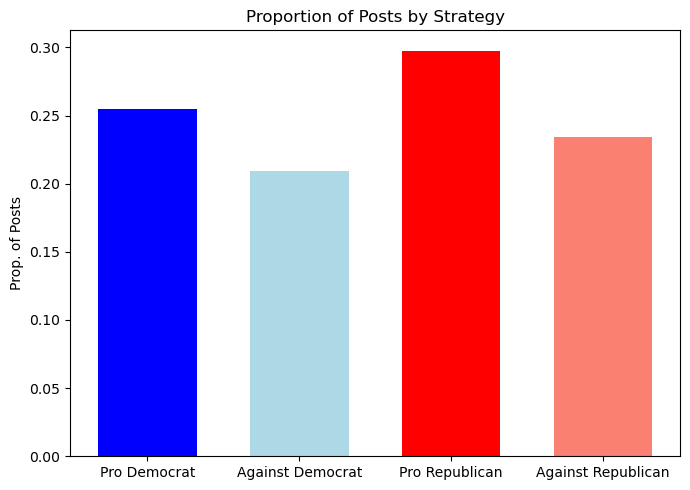

<Figure size 640x480 with 0 Axes>

In [22]:
# Get number of posts for each strategy 

avg_hashtags = {
    'Pro Democrat': df[df['pro_democrat'] == 1]['num_hashtags'].count()/len(df),
    'Against Democrat': df[df['against_democrat'] == 1]['num_hashtags'].count()/len(df),
    'Pro Republican': df[df['pro_republican'] == 1]['num_hashtags'].count()/len(df),
    'Against Republican': df[df['against_republican'] == 1]['num_hashtags'].count()/len(df)
}

# Plot
plt.figure(figsize=(7, 5))
plt.bar(avg_hashtags.keys(), avg_hashtags.values(), width = .65, color=['blue', 'lightblue', 'red', 'salmon'])
plt.ylabel('Prop. of Posts')
plt.title('Proportion of Posts by Strategy')
plt.tight_layout()
plt.show()

plt.savefig('Proportion of Posts by Strategy', dpi=300, bbox_inches='tight')

In [13]:
# Get avg hashtag count for each strategy

print(df[df['pro_democrat'] == 1]['num_hashtags'].mean())
print(df[df['against_democrat'] == 1]['num_hashtags'].mean())
print(df[df['pro_republican'] == 1]['num_hashtags'].mean())
print(df[df['against_republican'] == 1]['num_hashtags'].mean())


12.74897948898856
13.916557057926028
12.034790695382796
14.98482243341253


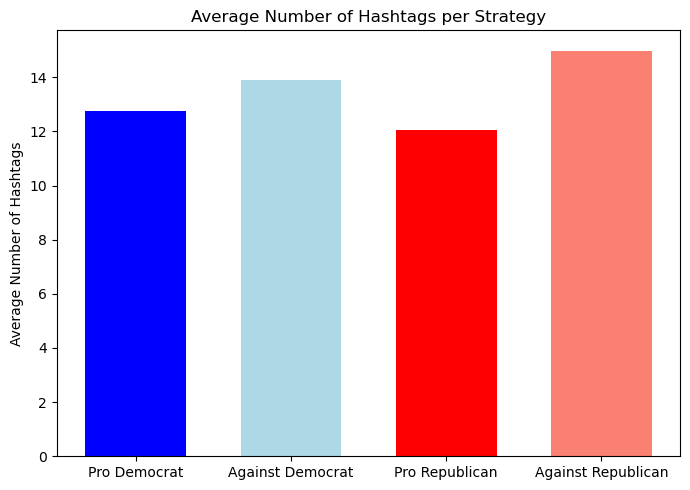

<Figure size 640x480 with 0 Axes>

In [19]:
avg_hashtags = {
    'Pro Democrat': df[df['pro_democrat'] == 1]['num_hashtags'].mean(),
    'Against Democrat': df[df['against_democrat'] == 1]['num_hashtags'].mean(),
    'Pro Republican': df[df['pro_republican'] == 1]['num_hashtags'].mean(),
    'Against Republican': df[df['against_republican'] == 1]['num_hashtags'].mean()
}

# Plot
plt.figure(figsize=(7, 5))
plt.bar(avg_hashtags.keys(), avg_hashtags.values(), width = .65, color=['blue', 'lightblue', 'red', 'salmon'])
plt.ylabel('Average Number of Hashtags')
plt.title('Average Number of Hashtags per Strategy')
plt.tight_layout()
plt.show()

plt.savefig('Average Number of Hashtags per Strategy.png', dpi=300, bbox_inches='tight')

In [15]:
avg = df['num_hashtags'].mean()
print("avg hashtags used:", avg)

df_viral = df[df['view_count'] >= 100000]
avg_viral = df_viral['num_hashtags'].mean()
print("avg hashtags used in viral posts:", avg_viral)

avg_pro_dem = df_viral[df['pro_democrat'] == 1]['num_hashtags'].mean()
print("avg viral pro dem:", avg_pro_dem)

avg_ag_dem = df_viral[df['against_democrat'] == 1]['num_hashtags'].mean()
print("avg viral ag dem:", avg_ag_dem)

avg_pro_rep = df_viral[df['pro_republican'] == 1]['num_hashtags'].mean()
print("avg pro rep:", avg_pro_rep)

avg_ag_rep = df_viral[df['against_republican'] == 1]['num_hashtags'].mean()
print("avg ag rep:", avg_ag_rep)


avg hashtags used: 12.277321430208152
avg hashtags used in viral posts: 10.01132473005004
avg viral pro dem: 9.999495967741936
avg viral ag dem: 9.161581137309293
avg pro rep: 9.431043807463494
avg ag rep: 10.887231503579953


/tmp/ipykernel_644426/485604634.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_pro_dem = df_viral[df['pro_democrat'] == 1]['num_hashtags'].mean()
/tmp/ipykernel_644426/485604634.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_ag_dem = df_viral[df['against_democrat'] == 1]['num_hashtags'].mean()
/tmp/ipykernel_644426/485604634.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_pro_rep = df_viral[df['pro_republican'] == 1]['num_hashtags'].mean()
/tmp/ipykernel_644426/485604634.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_ag_rep = df_viral[df['against_republican'] == 1]['num_hashtags'].mean()


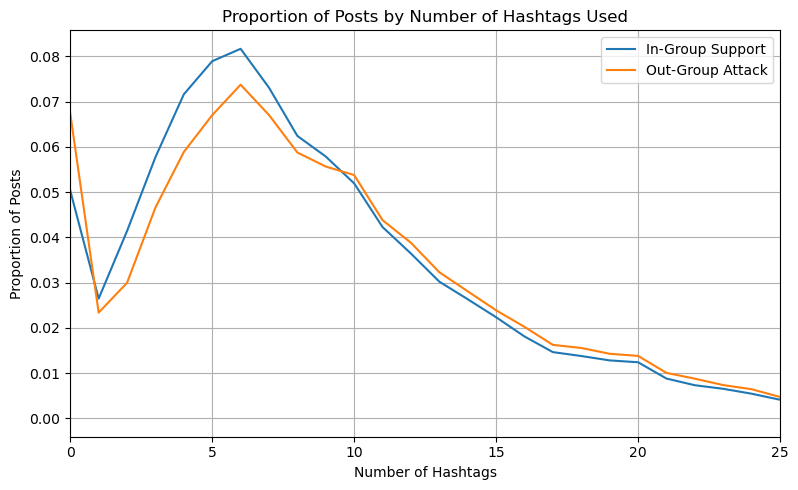

In [30]:

hashtag_count3 = df[(df['pro_democrat'] == 1) | (df['pro_republican'] == 1)]['num_hashtags'].value_counts(normalize=True).sort_index()
hashtag_count4 = df[(df['against_democrat'] == 1) | (df['against_republican'] == 1)]['num_hashtags'].value_counts(normalize=True).sort_index()


# Line plot
plt.figure(figsize=(8, 5))
plt.plot(hashtag_count3.index, hashtag_count3.values, linestyle='-', label='In-Group Support')
plt.plot(hashtag_count4.index, hashtag_count4.values, linestyle='-', label='Out-Group Attack')

plt.xlabel('Number of Hashtags')
plt.ylabel('Proportion of Posts')
plt.title('Proportion of Posts by Number of Hashtags Used')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 25)

plt.savefig('Proportion of Number of Hashtags Used by Strategy.png', dpi=300, bbox_inches='tight')  # Save before showing
plt.show()

In [23]:
# Line plot

plt.figure(figsize=(8, 5))


plt.plot(hashtag_count3.index, hashtag_count3.values, linestyle='-', label='Pro Republican')
plt.plot(hashtag_count4.index, hashtag_count4.values, linestyle='-', label='Against Republican')

plt.xlabel('Number of Hashtags')
plt.ylabel('Proportion of Posts')
plt.title('Proportion of Posts by Number of Hashtags Used')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 25)

plt.show()

plt.savefig('Proportion of Number of Hashtags Used by Strategy.png', dpi=300, bbox_inches='tight')

NameError: name 'hashtag_count1' is not defined

<Figure size 800x500 with 0 Axes>

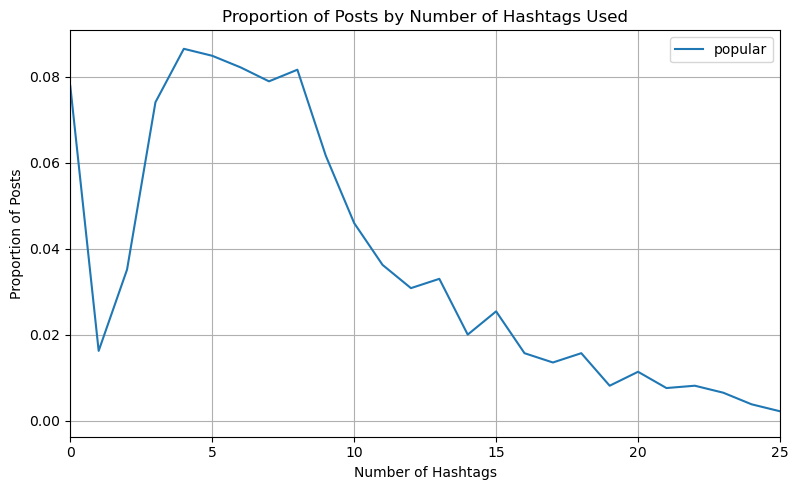

In [19]:
hashtag_viral = df_viral[df_viral['pro_republican'] == 1]['num_hashtags'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
plt.plot(hashtag_viral.index, hashtag_viral.values, linestyle='-', label='popular')
plt.xlabel('Number of Hashtags')
plt.ylabel('Proportion of Posts')
plt.title('Proportion of Posts by Number of Hashtags Used')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 25)
plt.show()
